### http://networkx.github.io/documentation/latest/examples/drawing/chess_masters.html

In [3]:
!cp /home/kevin/Desktop/chess_masters_WCC.pgn.bz2 .

In [4]:
"""
An example of the MultiDiGraph clas

The function chess_pgn_graph reads a collection of chess
matches stored in the specified PGN file
(PGN ="Portable Game Notation")
Here the (compressed) default file ---
 chess_masters_WCC.pgn.bz2 ---
contains all 685 World Chess Championship matches
from 1886 - 1985.
(data from http://chessproblem.my-free-games.com/chess/games/Download-PGN.php)

The chess_pgn_graph() function returns a MultiDiGraph
with multiple edges. Each node is
the last name of a chess master. Each edge is directed
from white to black and contains selected game info.

The key statement in chess_pgn_graph below is
    G.add_edge(white, black, game_info)
where game_info is a dict describing each game.

"""
#    Copyright (C) 2006-2010 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx

# tag names specifying what game info should be
# stored in the dict on each digraph edge
game_details=["Event",
              "Date",
              "Result",
              "ECO",
              "Site"]

def chess_pgn_graph(pgn_file="chess_masters_WCC.pgn.bz2"):
    """Read chess games in pgn format in pgn_file.

    Filenames ending in .gz or .bz2 will be uncompressed.

    Return the MultiDiGraph of players connected by a chess game.
    Edges contain game data in a dict.

    """
    import bz2
    G=nx.MultiDiGraph()
    game={}
    datafile = bz2.BZ2File(pgn_file)
    lines = (line.decode().rstrip('\r\n') for line in datafile)
    for line in lines:
        if line.startswith('['):
            tag,value=line[1:-1].split(' ',1)
            game[str(tag)]=value.strip('"')
        else:
        # empty line after tag set indicates
        # we finished reading game info
            if game:
                white=game.pop('White')
                black=game.pop('Black')
                G.add_edge(white, black, **game)
                game={}
    return G

In [5]:
G=chess_pgn_graph()

In [6]:
ngames=G.number_of_edges()
nplayers=G.number_of_nodes()

print("Loaded %d chess games between %d players\n" % (ngames,nplayers))

Loaded 685 chess games between 25 players



In [7]:
# identify connected components
# of the undirected version
Gcc=list(nx.connected_component_subgraphs(G.to_undirected()))
if len(Gcc)>1:
    print("Note the disconnected component consisting of:")
    print(Gcc[1].nodes())

Note the disconnected component consisting of:
[u'Karpov, Anatoly', u'Korchnoi, Viktor L', u'Kasparov, Gary']


In [8]:
# find all games with B97 opening (as described in ECO)
openings=set([game_info['ECO'] for (white,black,game_info) in G.edges(data=True)])
print("\nFrom a total of %d different openings,"%len(openings))
print('the following games used the Sicilian opening')
print('with the Najdorff 7...Qb6 "Poisoned Pawn" variation.\n')

for (white,black,game_info) in G.edges(data=True):
    if game_info['ECO']=='B97':
        print(white,"vs",black)
        for k,v in game_info.items():
            print("   ",k,": ",v)
        print("\n")



From a total of 237 different openings,
the following games used the Sicilian opening
with the Najdorff 7...Qb6 "Poisoned Pawn" variation.

(u'Spassky, Boris V', 'vs', u'Fischer, Robert J')
('   ', 'ECO', ': ', u'B97')
('   ', 'WhiteElo', ': ', u'2660')
('   ', 'Site', ': ', u'Reykjavik ISL')
('   ', 'BlackElo', ': ', u'2785')
('   ', 'EventDate', ': ', u'1972.07.11')
('   ', 'Result', ': ', u'1/2-1/2')
('   ', 'Date', ': ', u'1972.07.25')
('   ', 'Round', ': ', u'7')
('   ', 'Event', ': ', u'World Championship 28th')


(u'Spassky, Boris V', 'vs', u'Fischer, Robert J')
('   ', 'ECO', ': ', u'B97')
('   ', 'WhiteElo', ': ', u'2660')
('   ', 'Site', ': ', u'Reykjavik ISL')
('   ', 'BlackElo', ': ', u'2785')
('   ', 'EventDate', ': ', u'1972.07.11')
('   ', 'Result', ': ', u'1-0')
('   ', 'Date', ': ', u'1972.08.06')
('   ', 'Round', ': ', u'11')
('   ', 'Event', ': ', u'World Championship 28th')




Wrote chess_masters.png


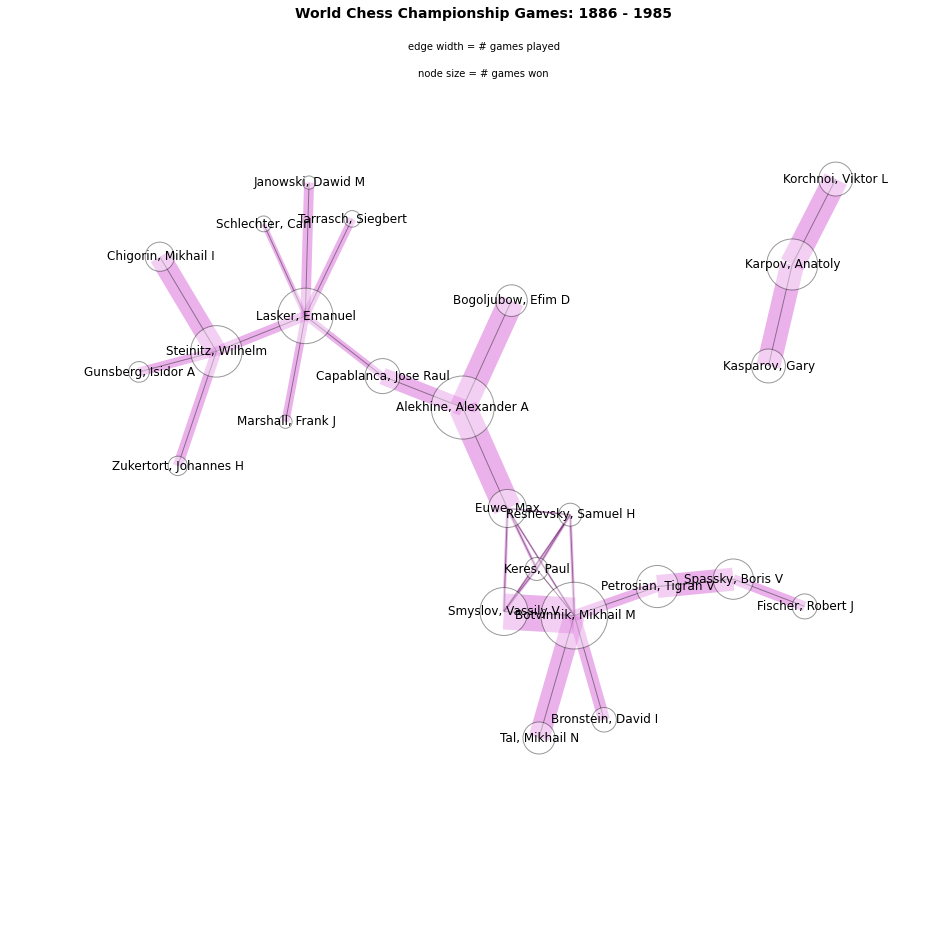

In [13]:


try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except ImportError:
    import sys
    print("Matplotlib needed for drawing. Skipping")
    sys.exit(0)

# make new undirected graph H without multi-edges
H=nx.Graph(G)

# edge width is proportional number of games played
edgewidth=[]
for (u,v,d) in H.edges(data=True):
    edgewidth.append(len(G.get_edge_data(u,v)))

# node size is proportional to number of games won
wins=dict.fromkeys(G.nodes(),0.0)
for (u,v,d) in G.edges(data=True):
    r=d['Result'].split('-')
    if r[0]=='1':
        wins[u]+=1.0
    elif r[0]=='1/2':
        wins[u]+=0.5
        wins[v]+=0.5
    else:
        wins[v]+=1.0
try:
    pos=nx.graphviz_layout(H)
except:
    pos=nx.spring_layout(H,iterations=20)

plt.rcParams['text.usetex'] = False
plt.figure(figsize=(16,16))
nx.draw_networkx_edges(H,pos,alpha=0.3,width=edgewidth, edge_color='m')
nodesize=[wins[v]*50 for v in H]
nx.draw_networkx_nodes(H,pos,node_size=nodesize,node_color='w',alpha=0.4)
nx.draw_networkx_edges(H,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
nx.draw_networkx_labels(H,pos,fontsize=14)
font = {'fontname'   : 'Helvetica',
        'color'      : 'k',
        'fontweight' : 'bold',
        'fontsize'   : 14}
plt.title("World Chess Championship Games: 1886 - 1985", font)

# change font and write text (using data coordinates)
font = {'fontname'   : 'Helvetica',
        'color'      : 'r',
        'fontweight' : 'bold',
        'fontsize'   : 14}

plt.text(0.5, 0.97, "edge width = # games played",
         horizontalalignment='center',
         transform=plt.gca().transAxes)
plt.text(0.5, 0.94,  "node size = # games won",
         horizontalalignment='center',
         transform=plt.gca().transAxes)

plt.axis('off')
plt.savefig("chess_masters.png",dpi=75)
print("Wrote chess_masters.png")
plt.show() # display

### http://www.d3noob.org/2013/03/directional-force-layout-diagram-node.html

http://bl.ocks.org/couchand/6420534

http://bl.ocks.org/d3noob/5141278#force.csv